In [1]:
# la différence fondamentale entre q-learning et sarsa

In [1]:
import gymnasium as gym
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def moving_average(values, window):
    weights = np.ones(window) / window
    return np.convolve(values, weights, mode='valid')

# SARSA

In [3]:
env = gym.make('CliffWalking-v0')

nS = env.observation_space.n
nA = env.action_space.n

gamma = 0.99
alpha = 0.5
epsilon = 0.2

In [4]:
pi = np.ones([nS, nA]) * 0.25
Q = np.zeros([nS, nA])

In [5]:
ep_rets = []

i = 0
for _ in range(3000):
    i+=1
    
    obs, _ = env.reset()
    a = np.random.choice(range(nA), p=pi[obs])

    ep_ret = 0

    while True:
        next_obs, r, terminated, truncated, _ = env.step(a)
        next_a = np.random.choice(range(nA), p=pi[next_obs])

        ep_ret += r

        Q[obs, a] = Q[obs, a] + alpha * (r + gamma * Q[next_obs, next_a] - Q[obs, a])

        best_a = np.argmax(Q[obs])
        for a in range(nA):
            if a != best_a:
                pi[obs, a] = epsilon/nA
            else:
                pi[obs, a] = epsilon/nA + (1 - epsilon)

        if terminated or truncated:
            ep_rets.append(ep_ret)
            break
        else:
            obs = next_obs
            a = next_a

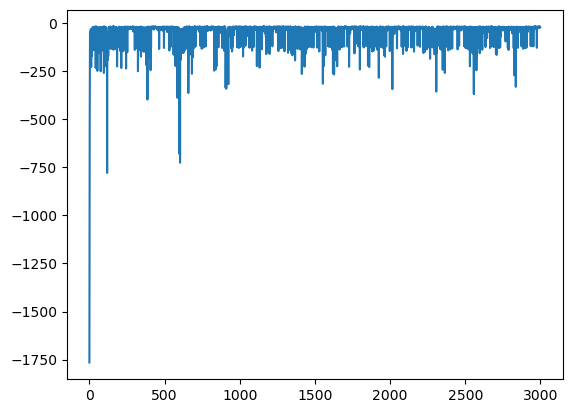

In [6]:
plt.plot(ep_rets)

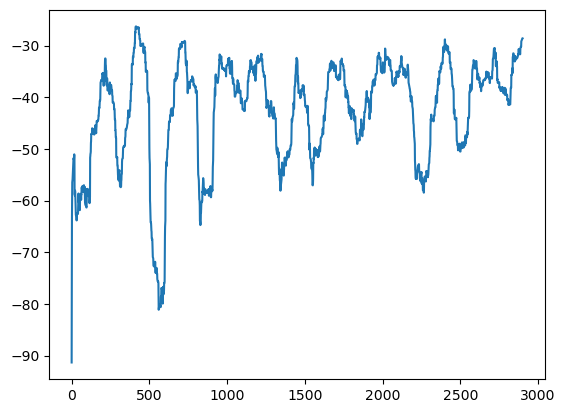

In [7]:
plt.plot(moving_average(ep_rets, 100))

In [8]:
# eval
ep_rets = []

for _ in range(100):  
    obs, _ = env.reset()
    a = np.argmax(Q[obs])

    ep_ret = 0

    while True:
        next_obs, r, terminated, truncated, _ = env.step(a)
        next_a = np.argmax(Q[next_obs])

        ep_ret += r

        if terminated or truncated:
            ep_rets.append(ep_ret)
            break
        else:
            obs = next_obs
            a = next_a

sum(ep_rets)/100

-17.0

In [9]:
pi_sarsa = np.ones([nS, nA]) * 0.25

for s in range(nS):
    best_a = np.argmax(Q[s])

    for a in range(nA):
        pi_sarsa[s, a] = 1 if a == best_a else 0

In [10]:
pi_sarsa

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


<Axes: >

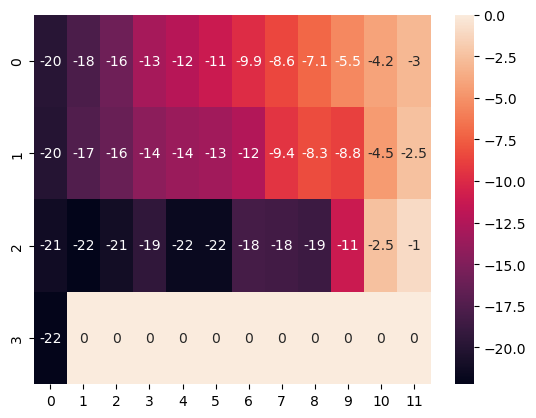

In [11]:
sns.heatmap(np.max(Q, axis=1).reshape((4,12)), annot=True)

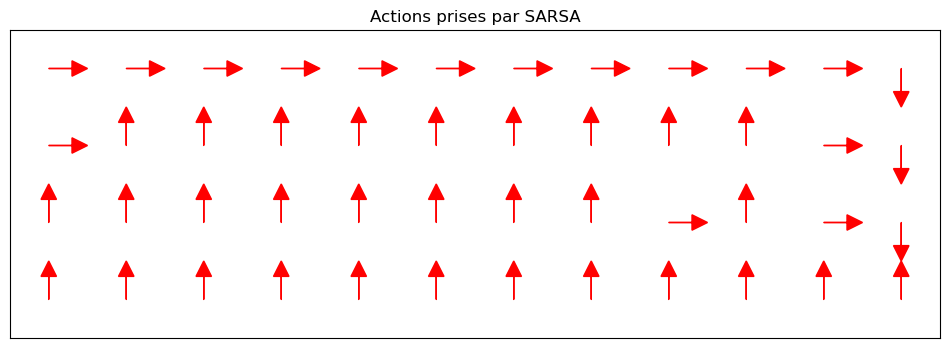

In [24]:
grid_shape = (4, 12)
policy_grid = np.zeros(grid_shape)

plt.figure(figsize=(12, 4))
plt.imshow(policy_grid, cmap='binary', aspect='auto')

# Overlay arrows based on policy
for i in range(grid_shape[0]):
    for j in range(grid_shape[1]):
        s = i * grid_shape[1] + j
        best_a = np.argmax(pi_sarsa[s])
        if best_a == 0:  # Assuming 0 is up
            plt.arrow(j, i, 0, -0.3, head_width=0.2, head_length=0.2, fc='red', ec='red')
        elif best_a == 1:  # Assuming 1 is right
            plt.arrow(j, i, 0.3, 0, head_width=0.2, head_length=0.2, fc='red', ec='red')
        elif best_a == 2:  # Assuming 2 is down
            plt.arrow(j, i, 0, 0.3, head_width=0.2, head_length=0.2, fc='red', ec='red')
        elif best_a == 3:  # Assuming 3 is left
            plt.arrow(j, i, -0.3, 0, head_width=0.2, head_length=0.2, fc='red', ec='red')

plt.xticks([])
plt.yticks([])
plt.title("Actions prises par SARSA")
plt.savefig('cliffwalking_sarsa.png', dpi=600)

# Q-learning

In [25]:
env = gym.make('CliffWalking-v0')

nS = env.observation_space.n
nA = env.action_space.n

gamma = 0.99
alpha = 0.5
epsilon = 0.2

In [26]:
pi = np.ones([nS, nA]) * 0.25
Q = np.zeros([nS, nA])

In [27]:
ep_rets = []

i = 0
for _ in range(3000):
    i+=1
    
    obs, _ = env.reset()
    a = np.random.choice(range(nA), p=pi[obs])

    ep_ret = 0

    while True:
        next_obs, r, terminated, truncated, _ = env.step(a)
        next_a = np.random.choice(range(nA), p=pi[next_obs])

        ep_ret += r

        Q[obs, a] = Q[obs, a] + alpha * (r + gamma * np.max(Q[next_obs]) - Q[obs, a])

        best_a = np.argmax(Q[obs])
        for a in range(nA):
            if a != best_a:
                pi[obs, a] = epsilon/nA
            else:
                pi[obs, a] = epsilon/nA + (1 - epsilon)

        if terminated or truncated:
            ep_rets.append(ep_ret)
            break
        else:
            obs = next_obs
            a = next_a

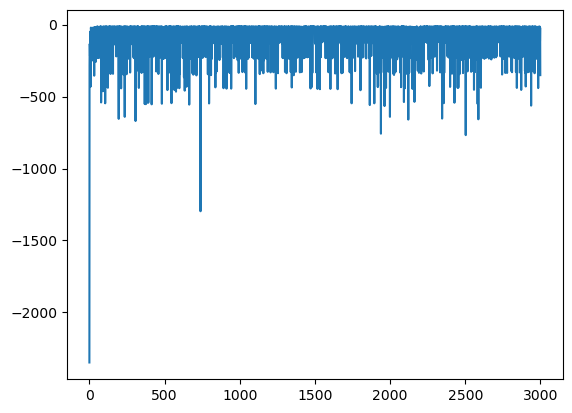

In [28]:
plt.plot(ep_rets)

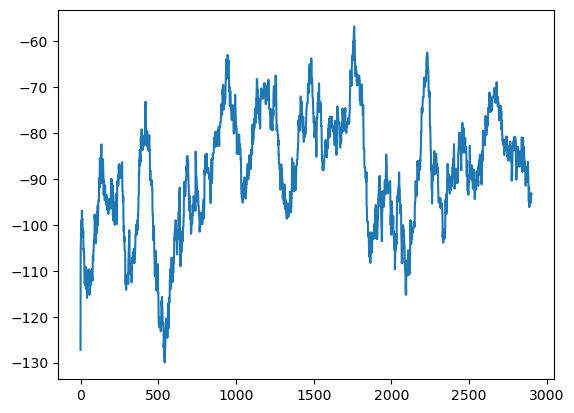

In [29]:
plt.plot(moving_average(ep_rets, 100))

In [30]:
# eval
ep_rets = []

for _ in range(100):  
    obs, _ = env.reset()
    a = np.argmax(Q[obs])

    ep_ret = 0

    while True:
        next_obs, r, terminated, truncated, _ = env.step(a)
        next_a = np.argmax(Q[next_obs])

        ep_ret += r

        if terminated or truncated:
            ep_rets.append(ep_ret)
            break
        else:
            obs = next_obs
            a = next_a

sum(ep_rets)/100

-13.0

In [31]:
pi_qlearning = np.ones([nS, nA]) * 0.25

for s in range(nS):
    best_a = np.argmax(Q[s])

    for a in range(nA):
        pi_qlearning[s, a] = 1 if a == best_a else 0

In [32]:
pi_qlearning

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


<Axes: >

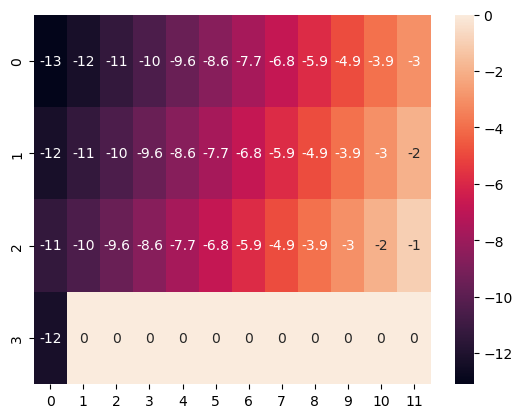

In [33]:
sns.heatmap(np.max(Q, axis=1).reshape((4,12)), annot=True)

In [34]:
%matplotlib inline

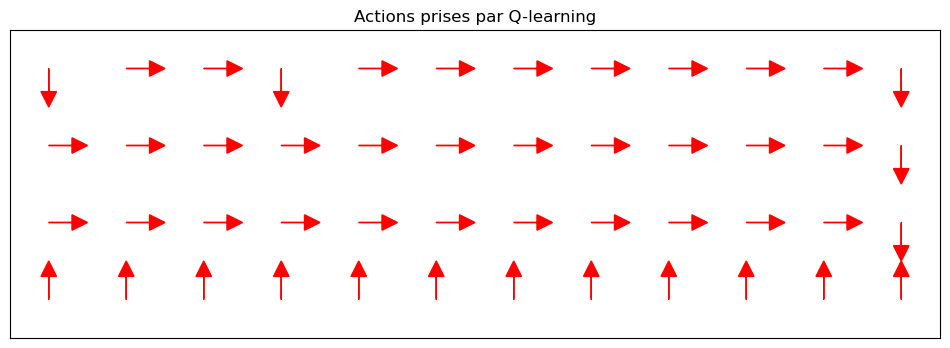

In [39]:
grid_shape = (4, 12)
policy_grid = np.zeros(grid_shape)

plt.figure(figsize=(12, 4))
plt.imshow(policy_grid, cmap='binary', aspect='auto')

# Overlay arrows based on policy
for i in range(grid_shape[0]):
    for j in range(grid_shape[1]):
        s = i * grid_shape[1] + j
        best_a = np.argmax(pi_qlearning[s])
        if best_a == 0:  # Assuming 0 is up
            plt.arrow(j, i, 0, -0.3, head_width=0.2, head_length=0.2, fc='red', ec='red')
        elif best_a == 1:  # Assuming 1 is right
            plt.arrow(j, i, 0.3, 0, head_width=0.2, head_length=0.2, fc='red', ec='red')
        elif best_a == 2:  # Assuming 2 is down
            plt.arrow(j, i, 0, 0.3, head_width=0.2, head_length=0.2, fc='red', ec='red')
        elif best_a == 3:  # Assuming 3 is left
            plt.arrow(j, i, -0.3, 0, head_width=0.2, head_length=0.2, fc='red', ec='red')

plt.xticks([])
plt.yticks([])
plt.title("Actions prises par Q-learning")
plt.savefig('cliffwalking_qlearning.png', dpi=600)